In [ ]:
from scipy import stats
import seaborn as sns
import  numpy as np
import matplotlib.pyplot as plt


##Uber Data

In [ ]:
id = "1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE" -O Uber_dataset.zip

--2022-07-01 13:34:47--  https://drive.google.com/uc?export=download&id=1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.102, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hg1t9f6r3fq7l0qgpa92vq3p11vja15q/1656682425000/10804243441129704195/*/1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE?e=download&uuid=0591a531-a129-4849-b769-e337c2f510ae [following]
--2022-07-01 13:34:48--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hg1t9f6r3fq7l0qgpa92vq3p11vja15q/1656682425000/10804243441129704195/*/1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE?e=download&uuid=0591a531-a129-4849-b769-e337c2f510ae
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 74.125.142.132, 2607:

In [ ]:
!unzip Uber_dataset.zip


Archive:  Uber_dataset.zip
  inflating: uber_travel_data.csv    
  inflating: __MACOSX/._uber_travel_data.csv  


In [ ]:
!ls -lrt

total 525784
-rw-r--r-- 1 root root 520141836 May 12 14:30 uber_travel_data.csv
drwxr-xr-x 1 root root      4096 Jun 29 13:44 sample_data
-rw-r--r-- 1 root root  18251707 Jul  1 13:34 Uber_dataset.zip
drwxr-xr-x 2 root root      4096 Jul  1 13:34 __MACOSX


In [ ]:
import pandas as pd

df = pd.read_csv("./uber_travel_data.csv")
df.sample(100).head()

,sourceid,source,dstid,destination,travel_time
3699703,234,"113, Press Colony, Press Colony, Mayapuri, New...",76,"124, SPG Quarters, Sector 4, Pushp Vihar, New ...",2695
2441504,156,"Doctor Satpal Sachdeva Marg, Keshav Puram, Tri...",230,"N494, Block N, Raghubir Nagar, Tagore Garden E...",958
1824456,119,"81, Zulfe Bengal, Dilshad Garden, Delhi",58,"Pushta Road, Block A, Rajiv Nagar, Sonia Vihar...",1401
198463,11,"Mother Teresa Crescent, Talkatora Garden, Cent...",283,NaN,957
488666,29,"Street Number 14, Block C, Sitapuri Part 1, Ja...",60,NaN,3026


In [ ]:
df.shape

(4542026, 5)

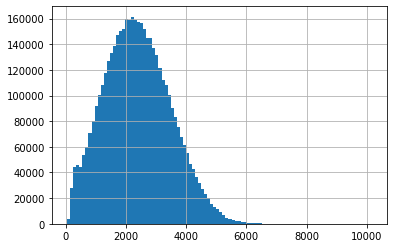

In [ ]:
# histogram of travel_times
df["travel_time"].hist(bins = 100)

In [ ]:
df.value_counts(['sourceid', 'dstid']).sort_values()

sourceid  dstid
69        4        50
167       107      50
          101      50
264       14       50
167       100      50
                   ..
83        88       79
244       32       79
202       201      79
          135      79
45        170      79
Length: 70429, dtype: int64

In [ ]:
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
data.shape

(75,)

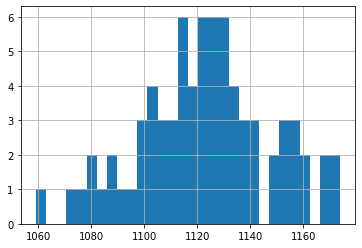

In [ ]:
data.hist(bins=30)

## CLT for C.I on mean of travel_time

In [ ]:
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=50
# bs_means is a list of 'r' bootstrap sample means
r = 10000
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 50
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)

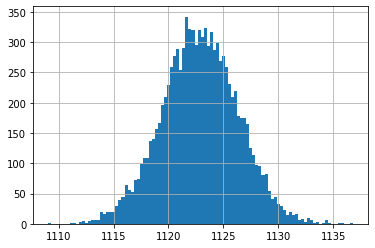

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

In [ ]:
# QQ-plot with normal distribution


In [ ]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means))
print(np.std(bs_means))

1122.85326
3.4374772628193493


In [ ]:
print(np.mean(bs_means)-2*np.std(bs_means))
print(np.mean(bs_means)+2*np.std(bs_means))

1115.9783054743614
1129.7282145256388


In [ ]:
# could we just use the 2.5th percentile and 97.5th percentile value
print(np.percentile(bs_means,2.5))
print(np.percentile(bs_means,97.5))

# what if r is say 100 and not 10,000?

1116.02
1129.52


## 95% C.I on 99th percentile value for travel_time via bootsrapping

In [ ]:
# What if we want a C.I on the 99th precentile?
#Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=1000
# bs_99p is a list of 'r' bootstrap sample's 99th percentiles
r = 10000
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 75
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [ ]:
len(bs_99p)

10000

In [ ]:
bs_99p

array([1167., 1167., 1174., ..., 1174., 1174., 1174.])

In [ ]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))


1162.56
1174.0


In [ ]:
# Point estimate of the 99th percenitle of the 75 observed samples
print(np.percentile(data,99))

1174.0


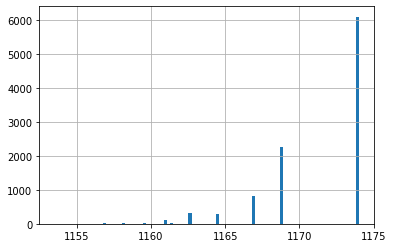

In [ ]:
# plot the pdf of bs_99p
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_99p, bins=100)
plt.grid()
plt.show()

## CLT as 'n' and 'r' changes

In [ ]:
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
data.shape

(75,)

### Change "r"

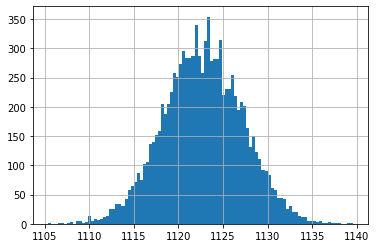

1122.7299666666668 4.429857032932577


In [ ]:
# n=30, r=10000
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=30
# bs_means is a list of 'r' bootstrap sample means
r = 10000
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 30
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)

plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

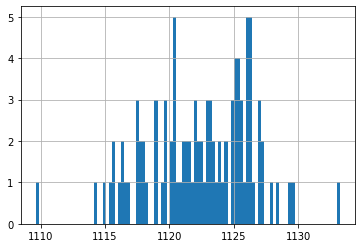

1122.3886666666665 3.983455284046753


In [ ]:
# n=30, r=100
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=30
# bs_means is a list of 'r' bootstrap sample means
r = 100
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 30
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)

plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

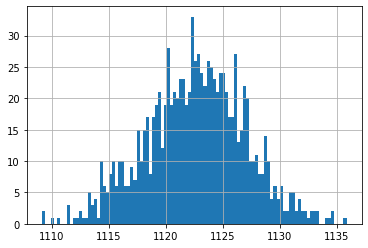

1122.5838999999999 4.3441068268786065


In [ ]:
# n=30, r=1000
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=30
# bs_means is a list of 'r' bootstrap sample means
r = 1000
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 30
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)

plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

### Change "n"

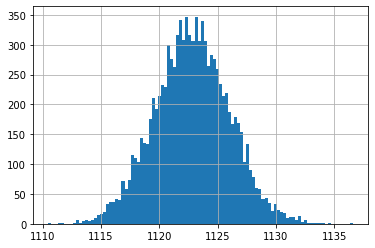

1122.8224 3.2077886318563236


In [ ]:
# n=60, r=10000
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=30
# bs_means is a list of 'r' bootstrap sample means
r = 10000
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 60
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)

plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

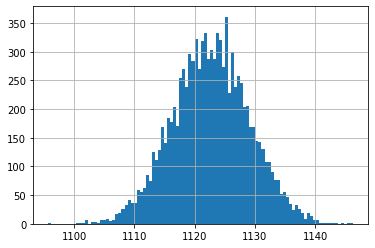

1122.7105866666666 6.337015344627504


In [ ]:
# n=15, r=10000
# Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=30
# bs_means is a list of 'r' bootstrap sample means
r = 10000
data = df[(df["sourceid"] == 1) & (df["dstid"] == 5)] ["travel_time"]
size = 15
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)

plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))